<a href="https://colab.research.google.com/github/SalahSoliman/Classification-Algorithms/blob/master/KNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Classification


##The following topics are covered in this lesson:


1.   Explanation of the K-Nearest Neighbor classification algorithm
2.   Implementation of the K-Nearest Neighbor classification algorithm at low level of implementation
3.   Implementation of the K-Nearest Neighbor classification algorithm using sklearn library on the cancer dataset.

##1. Explanation of the K-Nearest Neighbor algorithm.

Imagine you have two inputs, let's say x-axis is age of a company, and y-axis is there debt, for instance there might not be a direct relationship between them, but you have this data, and you want to know whether this company will grow or not (0 or 1), so the KNN algorithm will help you solve this problem by calculating the distance between the test point and all the neighbors.
Moreover, there are many tehcniques of calculating the distance, and many techniques of assessing which class does the test point belongs to.

###How to calculate the distance?
![alt text](https://www.saedsayad.com/images/KNN_similarity.png)

We will use the Euclidean distance method in this lesson.

let's assume we are assessing using 3 neighbors, so if you have 2 neighbors in class A, and 1 neighbor in class B, then the test point belongs to class A.

what if you chose k=2, and you have one neighbor in class A, and the other is class B, it's most likely to be the one closer to be the correct class.

Anyway it's advised to use odd numbers for k, this is not a rule.

##What is data Normalization and why do we need it in KNN?

Here's the normalization formula:

![alt text](https://miro.medium.com/max/682/0*oRhJXkyKqqYp8--e.)

This formula is applied to both x and y data.

In the following example the x-data range is [-5,5] and the y-data range is [-0.001, 0.001], so when calculating the euclidean distance the x-data has more influence on the classification, which means for instance distance = sqrt(sqr(x) + sqr(y)) then the distance will be **biased** to the x-data, as which we have the x-data for example is the monthly growth of a a firm, and the y-data for the stock price divided by a constant.

So they are two values that cannot be compared to each other, as if you ask a person how old are you, and he answers: "I'm 2 **meters old**", irrational and uninformative.

###That's why we use data normalization in the KNN algorithm, as we are substituing two different quantities in the same equation!



##2- Implementation of the K-Nearest Neighbor classification algorithm at low level of implementation


1.   Importing numpy, and matplotlib for plotting

2.   Checking the "K" is an odd number so that our classifying is always odd, in case it's an input from the user.
3.   Creating our dataset(which is random), so for ease instead of creating a labeling array, the first class is y1, and the second class is y2.
4.   Create a test point which is also random.
5. plot the dataset, and the test point.



Text(0.5, 1.0, 'Raw data')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

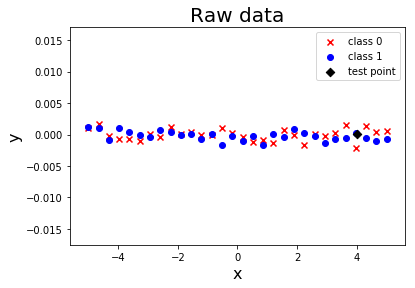

In [130]:
import numpy as np
import matplotlib.pyplot as plt
k = 2 # number of neighbors to evaluate the test data
if k%2==0:
  k=k+1
  
num = 30 #number of points in each class
x1 = np.linspace(-5, 5, num)
y1 = np.random.randn(num)*0.001 #Class 0
y2 = np.random.randn(num) *0.001 #Class 1

x_test = np.random.randn(1) * 2.5
y_test = np.random.randn(1) * 0.001

f = plt.figure(1)
plt.scatter(x1,y1, color="red", label="class 0", marker="x")
plt.scatter(x1,y2, color="blue", label="class 1", marker="o")
plt.scatter(x_test, y_test, color="black", marker="D", label="test point")
plt.title("Raw data", size=20)
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)
plt.legend(loc="best")

f.show()

Normalization is also called standardization so that's the variables names below.


![alt text](https://miro.medium.com/max/682/0*oRhJXkyKqqYp8--e.)


1.   Get the min, and max of each class.
2.   Normalize the dataset.
3.   Stack the x1 twice (will be explained later).
4.   Stack y1 and y2 (will be explained later).
5.   Normalize the test point.


In [0]:
#Normalization 

y1_min = np.min(y1)
y2_min = np.min(y2)


y1_max = np.max(y1)
y2_max = np.max(y2)

x1_min = np.min(x1) #we already know those but for generality
x1_max = np.max(x1)

standard_x1 = (x1 - x1_min)/(x1_max-x1_min)
standard_x_stack = np.append(standard_x1, standard_x1)
standard_y1 = (y1 - y1_min)/(y1_max-y1_min)
standard_y2 = (y2 - y2_min)/(y2_max-y2_min)
standard_y_stack = np.append(standard_y1, standard_y2)

standard_x_test = (x_test - x1_min)/(x1_max - x1_min)
standard_y_test = (y_test- min(y1_min, y2_min))/(max(y1_max, y2_max)-min(y1_min, y2_min))

Here's where action takes place!

1.   Calculate the distance between the test point, and all points.
2.   Stack the xy1, and xy2 distance
3.   Use ```np.argsort()``` to get the indices of the array if it where to be sorted, the first index is for the minimum value and the last index is for the maximum value.
4.   Plot a line between the test point and the closest three points.
5. If the number of blue points attached > red points, then it is considered a blue point, else red point.



Text(0.5, 1.0, 'Normalized data')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')


Test point belongs to Red points
[0.07613917 0.08081331 0.09084641 0.13549469 0.14526238 0.1547376
 0.17015056 0.19713006 0.22392242 0.22840714 0.24132271 0.27798893
 0.27801012 0.27879423 0.29234207 0.30625238 0.31411064 0.35871146
 0.36479067 0.37184867 0.38929932 0.40336043 0.41663456 0.42556286
 0.4301426  0.48586324 0.49113908 0.49490388 0.49565924 0.49786914
 0.50950022 0.52163318 0.52271668 0.53286787 0.55513224 0.55812901
 0.58706066 0.58928476 0.59053572 0.60539196 0.63175423 0.67076543
 0.6780647  0.68721171 0.68962958 0.69254157 0.7089261  0.72801163
 0.75494404 0.77442121 0.78354782 0.79063253 0.82350162 0.83475247
 0.8769762  0.90352931 0.92321814 0.92817892 0.95062048 0.98209618]


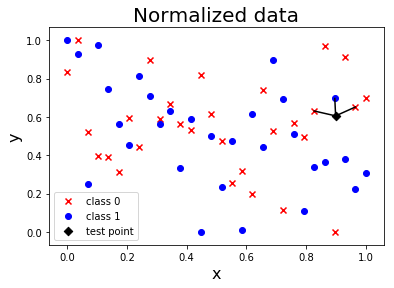

In [132]:

x_distance = np.square(standard_x_test - standard_x1)
y1_distance = np.square(standard_y_test - standard_y1)
y2_distance = np.square(standard_y_test - standard_y2)

xy1_distance = np.sqrt(x_distance + y1_distance)
xy2_distance = np.sqrt(x_distance + y2_distance)

stack = np.append(xy1_distance, xy2_distance)

sort = np.argsort(stack)

g = plt.figure(2)
plt.scatter(standard_x1,standard_y1, color="red", label="class 0", marker="x")
plt.scatter(standard_x1,standard_y2, color="blue", label="class 1", marker="o")

plt.scatter(standard_x_test, standard_y_test, color='black', marker="D", label="test point")
plt.title("Normalized data", size=20)
plt.xlabel("x", size=16)
plt.ylabel("y", size=16)

attached_c1_num = 0
attached_c2_num = 0

for i in range(k):
  if sort[i] < num:
    attached_c1_num = attached_c1_num + 1
  else:
    attached_c2_num = attached_c2_num + 1
  xx = np.linspace(standard_x_test, standard_x_stack[sort[i]], 100)
  yy = np.linspace(standard_y_test, standard_y_stack[sort[i]], 100)
  plt.plot(xx, yy, color="black")
print()
if attached_c1_num > attached_c2_num:
  print("Test point belongs to Red points")
else:
  print("Test point belongs to Blue points")

print(stack[sort[:]])
plt.legend(loc="best")
g.show()